In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import scipy.odr as odr

data_path = "/home/haue/repositories/Masters/data/padcal/"

P1 fit values:  -337.33812665698053   3.481105097061449
P1 Si residuals:  [-1.63  0.43 -0.49]
ch values:  [702.256, 981.696, 1422.16]  cal values:  [2105.66, 3080.48, 4612.86]

P2 fit values:  -289.38383454777073   3.0906269079400586
P2 Si residuals:  [-6.58  1.36 -1.59]
ch values:  [641.548, 987.736, 1511.94]  cal values:  [1686.82, 2764.7, 4381.87]

P3 fit values:  -302.2176883669376   3.1660971784934624
P3 Si residuals:  [-1.79  0.37 -0.45]
ch values:  [724.888, 1039.41, 1531.1]  cal values:  [1991.06, 2989.03, 4544.94]


P1 current cal values: -340.566 3.44028 --Multiplied by 1.016:  -346.01505599999996 3.49532448
P2 current cal values: -292.391 3.05255 --Multiplied by 1.016:  -297.069256 3.1013908000000003
P3 current cal values: -307.894 3.13171 --Multiplied by 1.016:  -312.820304 3.18181736


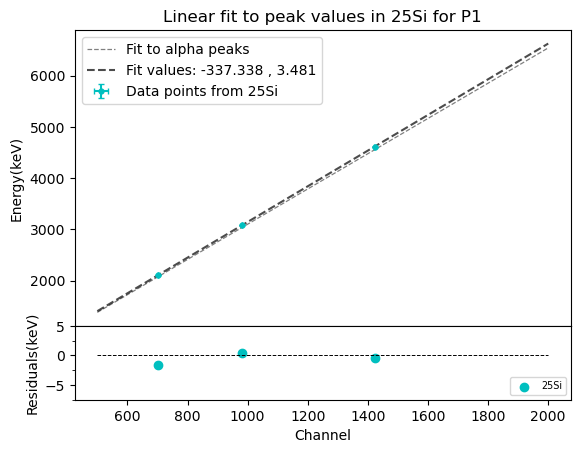

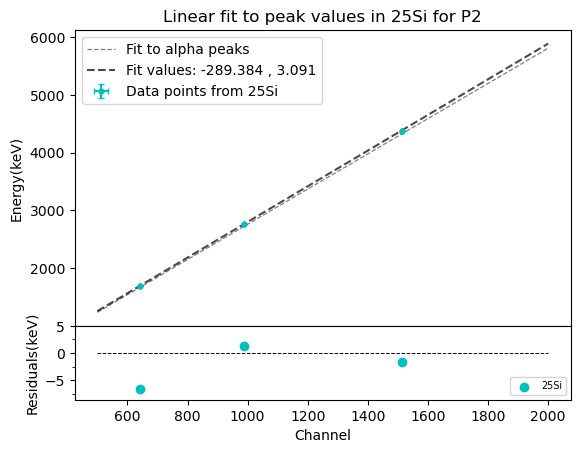

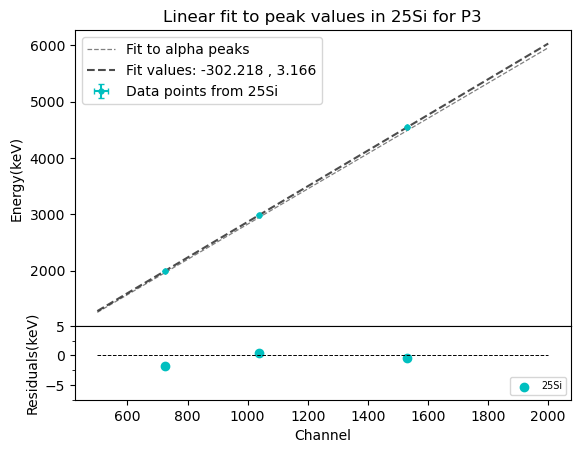

In [3]:
si_ch_dat = np.loadtxt(data_path+"Si_paired/newsical/reg_res.dat", unpack=True)
si_cal_dat = np.loadtxt(data_path+"Si_padcalc/newsical/reg_fit/res.dat", unpack=True)


si_ch = list(zip(si_ch_dat[0], si_ch_dat[1], si_ch_dat[2]))
si_cal = list(zip(si_cal_dat[0], si_cal_dat[1],  si_cal_dat[2]))
si_ch_p1 = [[x for x in si_ch[0]], [x for x in si_ch[1]], [x for x in si_ch[2]]]
si_ch_p2 = [[x for x in si_ch[3]], [x for x in si_ch[4]], [x for x in si_ch[5]]]
si_ch_p3 = [[x for x in si_ch[6]], [x for x in si_ch[7]], [x for x in si_ch[8]]]
si_cal_p1 = [[x for x in si_cal[0]], [x for x in si_cal[1]], [x for x in si_cal[2]]]
si_cal_p2 = [[x for x in si_cal[3]], [x for x in si_cal[4]], [x for x in si_cal[5]]]
si_cal_p3 = [[x for x in si_cal[6]], [x for x in si_cal[7]], [x for x in si_cal[8]]]

#def linfun(x,a,b):
#    return a*x+b
def linfun(B, x):
    # Linear function for ODR fitting
    return B[0] * x + B[1]

si_chs=[si_ch_p1, si_ch_p2, si_ch_p3]
si_cals = [si_cal_p1, si_cal_p2, si_cal_p3]
ab = []
alp_a = [3.44028, 3.05255, 3.13173]
alp_b = [-340.566, -292.3961, -307.894]

for i in range(3):
    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1], 'hspace': 0}, sharex=True)
    ax1, ax2 = axs

    model = odr.Model(linfun)

    data = odr.RealData(si_chs[i][0], si_cals[i][0], sx=si_chs[i][1], sy=si_cals[i][1])
    odr_instance = odr.ODR(data, model, beta0=[1, 1])
    output = odr_instance.run()
    a, b = output.beta
    xs = np.linspace(500, 2000)
    print(f"P{i+1} fit values: ",b," ",a)
    
    fit_values_si = linfun([a,b], np.array(si_chs[i][0]))
    si_residuals = si_cals[i][0]-fit_values_si
    
    print(f"P{i+1} Si residuals: ",np.round(si_residuals,2))
    
    ax1.plot(xs, linfun([alp_a[i], alp_b[i]], xs), ls='--', color='grey', lw=0.9, label="Fit to alpha peaks")
    
    ax1.set_title(f"Linear fit to peak values in 25Si for P{i+1}")
    ax2.set_xlabel("Channel")
    ax1.set_ylabel("Energy(keV)")
    ax1.plot(xs, linfun([a, b], xs), ls='--', color='k', alpha=0.7, label=f"Fit values: {np.round(b, 3)} , {np.round(a, 3)}")
    ax1.errorbar(si_chs[i][0],si_cals[i][0], xerr =si_chs[i][1],yerr=si_cals[i][1],marker='o',capsize=2, ls='',markersize=3.5,color='c', label="Data points from 25Si")
    ax1.legend()
    ax2.scatter(si_chs[i][0],si_residuals, color='c', label="25Si")
    ax2.legend(fontsize='x-small', loc='lower right')
    ax2.hlines(0, 500, 2000, ls='--', color='k', lw=0.7) 
    ax2.set_ylim(-np.max(np.abs(si_residuals))-2, np.max(np.abs(si_residuals))-2)
    ax2.set_yticks(np.arange(-7.5,7.5,2.5), minor=True)
    ax2.set_ylabel("Residuals(keV)")
    print("ch values: ", si_chs[i][0], " cal values: ", si_cals[i][0])
    print()
print()
print("P1 current cal values: -340.566 3.44028", "--Multiplied by 1.016: ",-340.566*1.016, 3.44028*1.016)
print("P2 current cal values: -292.391 3.05255", "--Multiplied by 1.016: ",-292.391*1.016, 3.05255*1.016)
print("P3 current cal values: -307.894 3.13171", "--Multiplied by 1.016: ",-307.894*1.016, 3.13171*1.016)



#### Narrow fits

P1 fit values:  -341.37145112430164   3.4866857683115686
P1 Si residuals:  [ 1.36 -0.33  0.32]
ch values:  [707.034, 985.402, 1423.67]  cal values:  [2125.19, 3094.09, 4622.84]
P2 fit values:  -287.9952482068886   3.090825484029249
P2 Si residuals:  [ 0.77 -0.27  0.32]
ch values:  [646.192, 992.998, 1514.26]  cal values:  [1710.04, 2780.92, 4392.64]
P3 fit values:  -293.90692246650707   3.1594120171794056
P3 Si residuals:  [ 0.19 -0.06  0.08]
ch values:  [727.305, 1042.13, 1533.26]  cal values:  [2004.14, 2998.55, 4550.37]

P1 current cal values: -340.566 3.44028 --Multiplied by 1.016:  -345.33392399999997 3.49532448
P2 current cal values: -292.391 3.05255 --Multiplied by 1.016:  -296.48447400000003 3.1013908000000003
P3 current cal values: -307.894 3.13171 --Multiplied by 1.016:  -312.204516 3.18181736


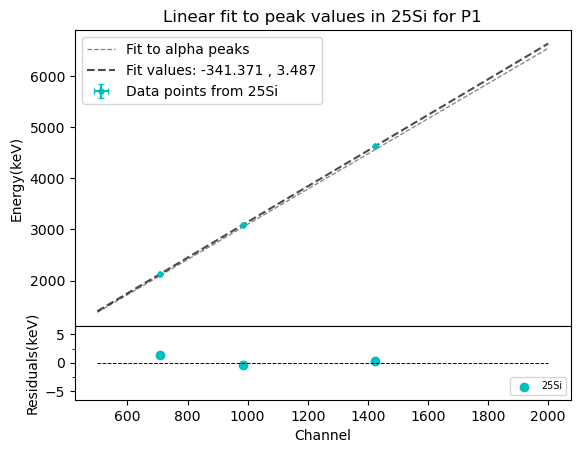

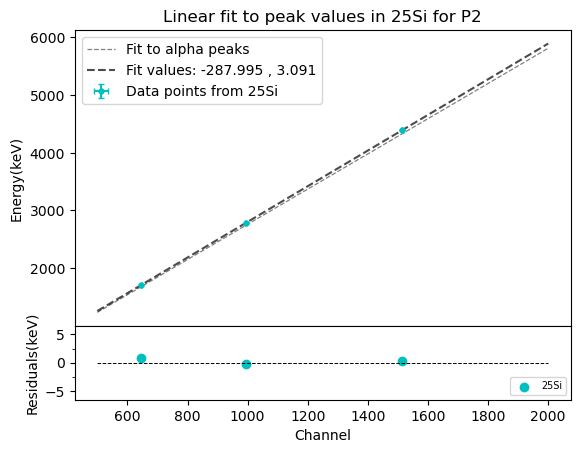

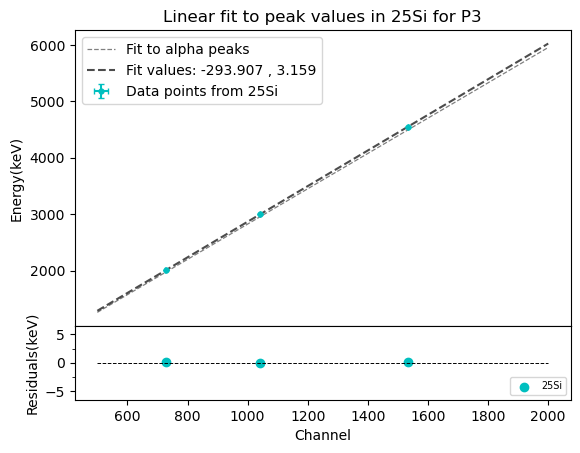

In [4]:

si_ch_dat = np.loadtxt(data_path+"Si_paired/newsical/nar_res.dat", unpack=True)
si_cal_dat = np.loadtxt(data_path+"Si_padcalc/newsical/nar_fit/res.dat", unpack=True)


si_ch = list(zip(si_ch_dat[0], si_ch_dat[1], si_ch_dat[2]))
si_cal = list(zip(si_cal_dat[0], si_cal_dat[1],  si_cal_dat[2]))
si_ch_p1 = [[x for x in si_ch[0]], [x for x in si_ch[1]], [x for x in si_ch[2]]]
si_ch_p2 = [[x for x in si_ch[3]], [x for x in si_ch[4]], [x for x in si_ch[5]]]
si_ch_p3 = [[x for x in si_ch[6]], [x for x in si_ch[7]], [x for x in si_ch[8]]]
si_cal_p1 = [[x for x in si_cal[0]], [x for x in si_cal[1]], [x for x in si_cal[2]]]
si_cal_p2 = [[x for x in si_cal[3]], [x for x in si_cal[4]], [x for x in si_cal[5]]]
si_cal_p3 = [[x for x in si_cal[6]], [x for x in si_cal[7]], [x for x in si_cal[8]]]

def linfun(B, x):
    # Linear function for ODR fitting
    return B[0] * x + B[1]
si_chs = [si_ch_p1, si_ch_p2, si_ch_p3]
si_cals = [si_cal_p1, si_cal_p2, si_cal_p3]
ab = []
alp_a = [3.44028, 3.05255, 3.13173]
alp_b = [-340.566, -292.3961, -307.894]

for i in range(3):
    fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1], 'hspace': 0}, sharex=True)
    ax1, ax2 = axs
    x_data = si_chs[i][0]
    y_data = si_cals[i][0]
    x_err = si_chs[i][1]
    y_err = si_cals[i][1]
    model = odr.Model(linfun)

    data = odr.RealData(si_chs[i][0], si_cals[i][0], sx=si_chs[i][1], sy=si_cals[i][1])
    odr_instance = odr.ODR(data, model, beta0=[1, 1])
    output = odr_instance.run()
    a, b = output.beta
    #popt, _ = sc.curve_fit(linfun, ch[i][0][0], cals[i][0][0], sigma=cals[i][1][0])
    xs = np.linspace(500, 2000)
    #a,b = popt
    print(f"P{i+1} fit values: ",b," ",a)
    
    fit_values_si = linfun([a,b], np.array(si_chs[i][0]))
    si_residuals = si_cals[i][0]-fit_values_si
    
    print(f"P{i+1} Si residuals: ",np.round(si_residuals,2))
    
    ax1.plot(xs, linfun([alp_a[i], alp_b[i]], xs), ls='--', color='grey', lw=0.9, label="Fit to alpha peaks")
    
    ax1.set_title(f"Linear fit to peak values in 25Si for P{i+1}")
    ax2.set_xlabel("Channel")
    ax1.set_ylabel("Energy(keV)")
    ax1.plot(xs, linfun([a, b], xs), ls='--', color='k', alpha=0.7, label=f"Fit values: {np.round(b, 3)} , {np.round(a, 3)}")
    ax1.errorbar(si_chs[i][0],si_cals[i][0], xerr =si_chs[i][1],yerr=si_cals[i][1],marker='o',capsize=2, ls='',markersize=3.5,color='c', label="Data points from 25Si")
    ax1.legend()
    ax2.scatter(si_chs[i][0],si_residuals, color='c', label="25Si")
    ax2.legend(fontsize='x-small', loc='lower right')
    ax2.hlines(0, 500, 2000, ls='--', color='k', lw=0.7) 
    ax2.set_ylim(-6.5, 6.5)
    ax2.set_yticks(np.arange(-5,5,2.5), minor=True)
    ax2.set_ylabel("Residuals(keV)")
    print("ch values: ", si_chs[i][0], " cal values: ", si_cals[i][0])
print()
print("P1 current cal values: -340.566 3.44028", "--Multiplied by 1.016: ",-340.566*1.014, 3.44028*1.016)
print("P2 current cal values: -292.391 3.05255", "--Multiplied by 1.016: ",-292.391*1.014, 3.05255*1.016)
print("P3 current cal values: -307.894 3.13171", "--Multiplied by 1.016: ",-307.894*1.014, 3.13171*1.016)

